In [12]:
import pandas as pd
from sklearn import linear_model

# Загрузка датасетов
X = pd.read_csv('data/1_x.csv', header=None)
Y = pd.read_csv('data/1_y.csv', header=None)

In [13]:
# Количество точек данных
num_points = len(X)

# Количество признаков
num_features = X.shape[1]

# Статистика по каждому признаку
statistics = X.describe()

print(f"Количество точек данных: {num_points}")
print(f"Количество признаков: {num_features}")
print("Статистика по каждому признаку:")
print(statistics)

Количество точек данных: 98041
Количество признаков: 1
Статистика по каждому признаку:
                  0
count  98041.000000
mean       1.372231
std      307.181475
min    -1271.336670
25%     -205.125738
50%        1.223641
75%      208.823801
max     1383.040152


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Коэффициент для признака 1: [1.]


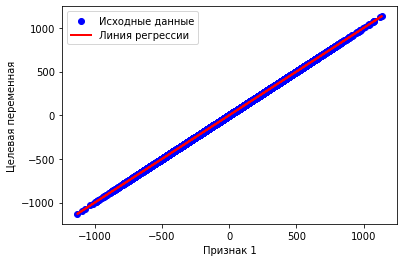

In [16]:
import matplotlib.pyplot as plt

# Построение парных регрессионных моделей
for i in range(num_features):
    # Создание пустой модели
    reg = linear_model.LinearRegression()
    
    # Обучение модели
    reg.fit(X_train.iloc[:, i].values.reshape(-1, 1), Y_train)
    
    # Получение коэффициентов
    coef = reg.coef_
    print(f"Коэффициент для признака {i+1}: {coef[0]}")
    
    # Предсказание значений
    predicted = reg.predict(X_test.iloc[:, i].values.reshape(-1, 1))
    
    # Визуализация линии регрессии и исходных данных
    plt.scatter(X_test.iloc[:, i], Y_test, color='blue', label='Исходные данные')
    plt.plot(X_test.iloc[:, i], predicted, color='red', linewidth=2, label='Линия регрессии')
    plt.xlabel(f"Признак {i+1}")
    plt.ylabel("Целевая переменная")
    plt.legend()
    plt.show()

In [17]:
# Создание пустой модели
reg = linear_model.LinearRegression()

# Обучение модели
reg.fit(X_train, Y_train)

# Коэффициенты
coef = reg.coef_
print("Коэффициенты:")
for i in range(num_features):
    print(f"b{i+1}: {coef[0][i]}")

# Оценка качества регрессии
score = reg.score(X_test, Y_test)
print(f"R2-критерий эффективности: {score}")


Коэффициенты:
b1: 0.9999999999999983
R2-критерий эффективности: 1.0
